In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from graph_utils import *
from performance_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# The groundtruth
N = 100
x_star = generate_population(N)

In [100]:
# Parameters
r = 0.2
d = 4
a = (2. * d) / (1. + r)
b = a * r

print(f'd = {d}')
print(f'r = {r}')
print(f'r_c = {(d-1)/(d+2)}')
print(f'a = {a}')
print(f'b = {b}')

d = 4
r = 0.2
r_c = 0.5
a = 6.666666666666667
b = 1.3333333333333335


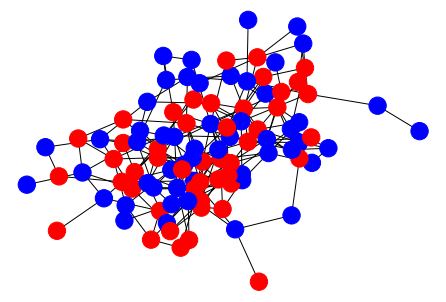

In [103]:
G = build_graph(x_star, a, b)
draw_graph(G, x_star)

# Metropolis

In [119]:
from metropolis import *
def run_simulation(A, a, b, nb_run, nb_iter):
    x_list = []
    mc = Metropolis(A, a, b)
    for n in range(nb_run):
        mc.reset()
        for i in range(nb_iter):
            mc.step()
        x = mc.x.copy()
        # Prevent unnecessary cancellation
        #if x[0] < 0:
        #    x *= -1
        x_list.append(x)
    return x_list

In [128]:
nb_run = 100
nb_iter = 1000
x_list = []

# Run simulation
A = nx.to_numpy_array(G)
x_list = run_simulation(A, a, b, nb_run, nb_iter)

x_hat overlap: 0.08


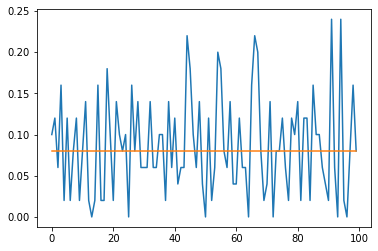

In [129]:
x_hat = np.average(x_list, axis=0)
x_hat = np.where(x_hat > 0, 1, -1)
q_hat = compute_overlap(x_star, x_hat)
print(f'x_hat overlap: {q_hat}')

qs = [compute_overlap(x_star, x) for x in x_list]
ns = range(len(qs))
plt.plot(qs)
plt.plot(ns, [q_hat for i in ns]);

x_hat overlap: 0.1


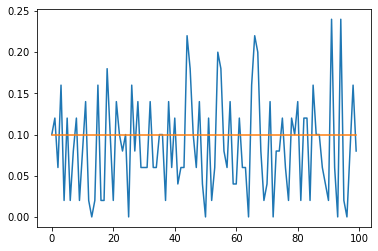

In [130]:
x_list2 = [x if x[0] > 0 else -x for x in x_list]
x_hat = np.average(x_list2, axis=0)
x_hat = np.where(x_hat > 0, 1, -1)
q_hat = compute_overlap(x_star, x_hat)
print(f'x_hat overlap: {q_hat}')

qs = [compute_overlap(x_star, x) for x in x_list2]
ns = range(len(qs))
plt.plot(qs)
plt.plot(ns, [q_hat for i in ns]);

In [126]:
# Check if overlap improves with the number of samples
nb_runs = np.linspace(100, 1000, 10, dtype=int)
q_runs = []
for nb_run in nb_runs:
    x_list = run_simulation(A, a, b, nb_run, nb_iter)
    x_list = [x if x[0] > 0 else -x for x in x_list]
    x_hat = np.average(x_list, axis=0)
    x_hat = np.where(x_hat > 0, 1, -1)
    q_runs.append(compute_overlap(x_star, x_hat))

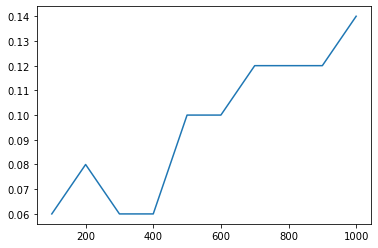

In [127]:
plt.plot(nb_runs, q_runs);